# **Projeto: Análise de Risco de Crédito**

Análise de risco de crédito é uma solução financeira que procura investigar a capacidade de uma pessoa ou empresa de pagar pela compra de um produto ou pela prestação de algum serviço. E mesmo que a pessoa ou empresa analisada se mostre com condições de saldar a dívida que quer contrair, a avaliação do risco verifica se o histórico do comportamento dela no mercado é bom.


Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

# Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não cumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.



Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

Objetivo: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.

Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

Importação de Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio deste [link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo csv contendo 45.000 entradas e 43 colunas.

Este arquivo será importado para uma estrutura DataFrame utilizando a biblioteca pandas a fim de possibilitar sua manipulação e análise.

In [65]:
# Importar os pacotes necessários

# pandas para manipulação dos dados
import pandas as pd

# matplotlib para nossos gráficos
import matplotlib.pyplot as plt

# seaborn para uma melhor visualização dos gráficos
import seaborn as sns

# numpy para manipulações matemáticas
import numpy as np

In [66]:
# Definir o estilo do seaborn para os plots
sns.set_style()

In [67]:
# Filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Importando os dados
base_credit = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

# Análise Exploratória dos **dados**

In [69]:
# Dimensões do df
print("Dimensões do DataFrame:")
print("Linhas:\t\t{}".format(base_credit.shape[0]))
print("Colunas:\t{}".format(base_credit.shape[1]))

Dimensões do DataFrame:
Linhas:		45000
Colunas:	43


In [70]:
# Informação das colunas e tipos de dados
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [71]:
# Visualizando os 5 primeiros registros
base_credit.head(5)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [72]:
# Análise de dados ausentes
print((base_credit.isnull().sum() / base_credit.shape[0]).sort_values(ascending=False))

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       



Em relação à porcentagem de valores ausentes identificados neste dataset:

* Diversas variáveis como ['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year'] possuem mais da metade dos valores ausentes.

* As variáves ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] possuem entre 25-34% do seus valores ausentes.

Em relação à porcentagem de valores preenchidos identificados neste dataset:

* As variáveis ['shipping_zip_code','score_4','score_5','profile_tags','score_6','application_time_in_funnel','shipping_state','reported_income','application_time_applied','profile_phone_number','external_data_provider_fraud_score','external_data_provider_first_name', 'external_data_provider_credit_checks_last_month',email',ids'] estão totalmente preenchidas.

* A variável alvo target_default contém valores nulos que serão eliminados do dataset.

Neste projeto, o caso mais extremo (target_fraud) não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. Já as demais features deverão ser usadas com o devido cuidado.

Uma outra análise interessante de se fazer diz respeito à contagem de valores únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".


In [73]:
base_credit.isnull().sum()

ids                                                     0
target_default                                       3259
score_1                                               562
score_2                                               562
score_3                                               562
score_4                                                 0
score_5                                                 0
score_6                                                 0
risk_rate                                             562
last_amount_borrowed                                29956
last_borrowed_in_months                             29956
credit_limit                                        13800
reason                                                566
income                                                562
facebook_profile                                     4458
state                                                 562
zip                                                   562
channel       

In [74]:
print(base_credit.nunique().sort_values())

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

A contagem de valores únicos mostra que as colunas external_data_provider_credit_checks_last_2_year e channel apresentam um único valor possível. Como não há maiores informações sobre cada feature, as duas colunas serão descartadas para o modelo de Machine Learning.

A coluna **ids** é anônima e representa o identificador único do cliente. Normalmente essa coluna não influência no modelo de machine learning.

A coluna **target_default** é o nosso alvo. Essa coluna representa no dataset se o cliente cumpriu ou não com as obrigações junto a instituição financeira.

As colunas **score_1** e **score_2** estão codificadas de alguma forma. As colunas **score_3**, **score_4**, **score_5** e **score_6** são numéricas. Essas variáveis classificam o cliente quanto a pontuação de crédito e iremos verificar a quantidade de códigos para analisar a sua transformação para categorias.

Existem outras variáveis que apresentam algum tipo de codificação, como [‘reason’, ‘state’, ‘zip’, ‘channel’, ‘job_name’, ‘real_state’] que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.

A coluna **lat_lon** está em formato string contendo uma tupla com as coordenadas. A coluna shipping_zip_code é referente ao CEP do canal de comunicação indicado pelo cliente, assim como a coluna zip provavelmente representa o CEP do imóvel onde o empréstimo foi realizado.

As colunas **last_amount_borrowed**, **last_borrowed_in_months**, **credit_limit** indicam a existência de empréstimos, quando o último empréstimo foi realizado e o limite de crédito para o cliente.


# **Tratamento dos dados**

Conforme nossas informações vamos fazer algumas limpezas

In [75]:
# Cópia do Dataset
base_credit_clean = base_credit.copy()

In [76]:
# excluir valores ausentes no campo target_default devido a ausência
# de estratégia aplicável neste caso.
base_credit_clean.dropna(subset=['target_default'], inplace=True)

In [77]:
# As colunas ids, external_data_provider_credit_checks_last_2_year, channel e
# profile_phone_number serão excluídas conforme comentado acima.
base_credit_clean.drop(labels=['ids', 'external_data_provider_credit_checks_last_year', 'channel', 'profile_phone_number'], axis=1, inplace=True)

In [78]:
# Substituindo
base_credit_clean['reported_income'] = base_credit_clean['reported_income'].replace(np.inf, np.nan)

In [79]:
# Substituindo o valor -999 em 'external_data_provider_email_seen_before' por 'NaN'
base_credit_clean.loc[base_credit_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

In [80]:
# Eliminando as colunas sem informação aparente ou que demandam mais pesquisa

# Variável temporária para armazenar o label das colunas a serem eliminadas
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'target_fraud']

# Eliminar as colunas
base_credit_clean.drop(labels=drop_var, axis=1, inplace=True)



Como não temos informações sobre todas as colunas (features), vamos assumir como verdade que :

  1. Algumas não são obrigatórias (exemplo perfil no Facebook);

  2. Por não conhecermos em detalhes o dataset, para dados que se referem às últimas ocorrências, com informação null, vamos considerar zero , exemplo ['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues'].

  3. Para as variáveis numéricas, com valor NaN será adotado o valor da mediana

  4. Para as categóricas o valor mais frequente.



In [81]:
# substituição de valores ausentes confome item 2 de nossa análise anterior
base_credit_clean.last_amount_borrowed.fillna(value=0, inplace=True)
base_credit_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
base_credit_clean.n_issues.fillna(value=0, inplace=True)

In [82]:
# Importando a biblioteca para substituição dos valores conforme definido acima no item 4
from sklearn.impute import SimpleImputer

# Atribuindo os labels das colunas númericas a uma variável
num_df = base_credit_clean.select_dtypes(exclude='object').columns

# Atribuindo os labels das colunas categórcias a uma variável
cat_df = base_credit_clean.select_dtypes(include='object').columns


In [83]:
# substituindo as variáveis categóricas pelos valores mais frequentes conforme definido acima no item 4
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(base_credit_clean.loc[:,cat_df])
base_credit_clean.loc[:,cat_df] = imputer.transform(base_credit_clean.loc[:,cat_df])

In [84]:
# substituindo as variáveis numéricas pela mediana conforme definido acima no item 3
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(base_credit_clean.loc[:,num_df])
base_credit_clean.loc[:,num_df] = imputer.transform(base_credit_clean.loc[:,num_df])

Vamos verificar se as variáveis escolhidas não possuem mais os valores nulos iniciais.

In [85]:
# verificar a quantidade de dados nulos
base_credit_clean.isnull().sum()

target_default                                      0
score_1                                             0
score_2                                             0
score_3                                             0
score_4                                             0
score_5                                             0
score_6                                             0
risk_rate                                           0
last_amount_borrowed                                0
last_borrowed_in_months                             0
credit_limit                                        0
income                                              0
facebook_profile                                    0
state                                               0
real_state                                          0
ok_since                                            0
n_bankruptcies                                      0
n_defaulted_loans                                   0
n_accounts                  

# **Análise dos Dados**

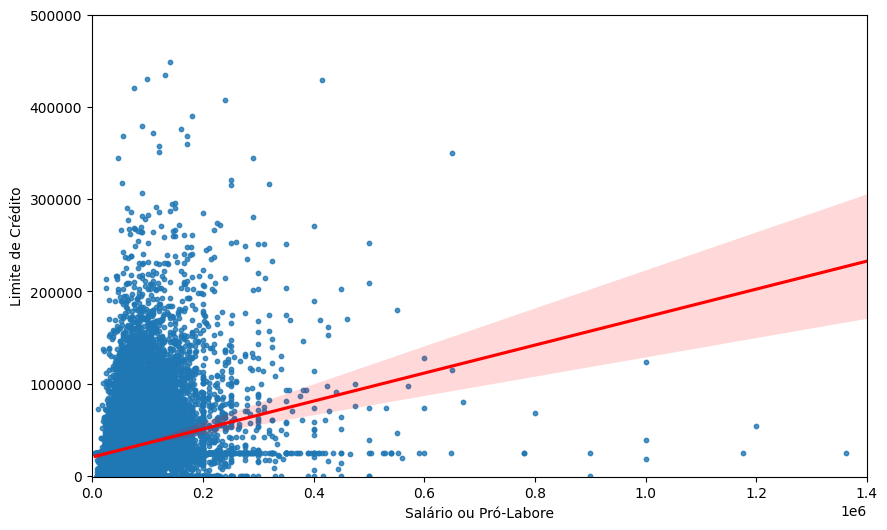

In [86]:
# Gráfico de Dispersão Crédito x Income
# scatter plot
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=-1000,right=1400000)
ax.set_ylim(bottom=-1000,top=500000)
sns.regplot(x='income', y='credit_limit', scatter_kws={"s": 10},
            line_kws={"color": "red"}, data=base_credit_clean, ax=ax);
ax.set_ylabel('Limite de Crédito')
ax.set_xlabel('Salário ou Pró-Labore')
ax.plot()
fig.savefig("Default-scatterplot.jpg")

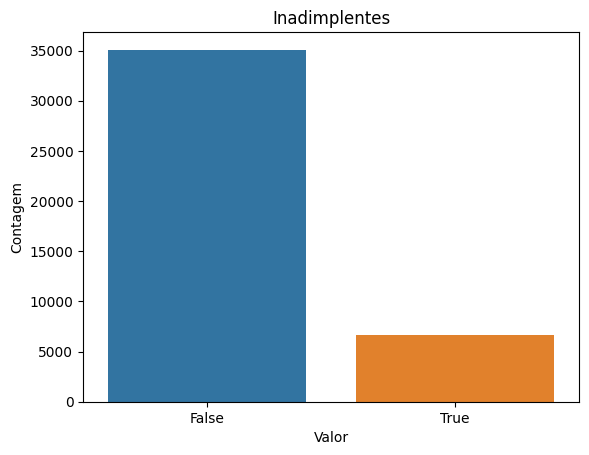

Proporção entre Inadimplentes no Dataset:
False    84.042069
True     15.957931
Name: target_default, dtype: float64


In [87]:
# Analisando quantitativo de inadimplentes

fig, ax = plt.subplots()
sns.countplot(x=base_credit_clean['target_default'])
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

print("Proporção entre Inadimplentes no Dataset:")
print((base_credit_clean['target_default'].value_counts() / base_credit_clean.shape[0] )*100)

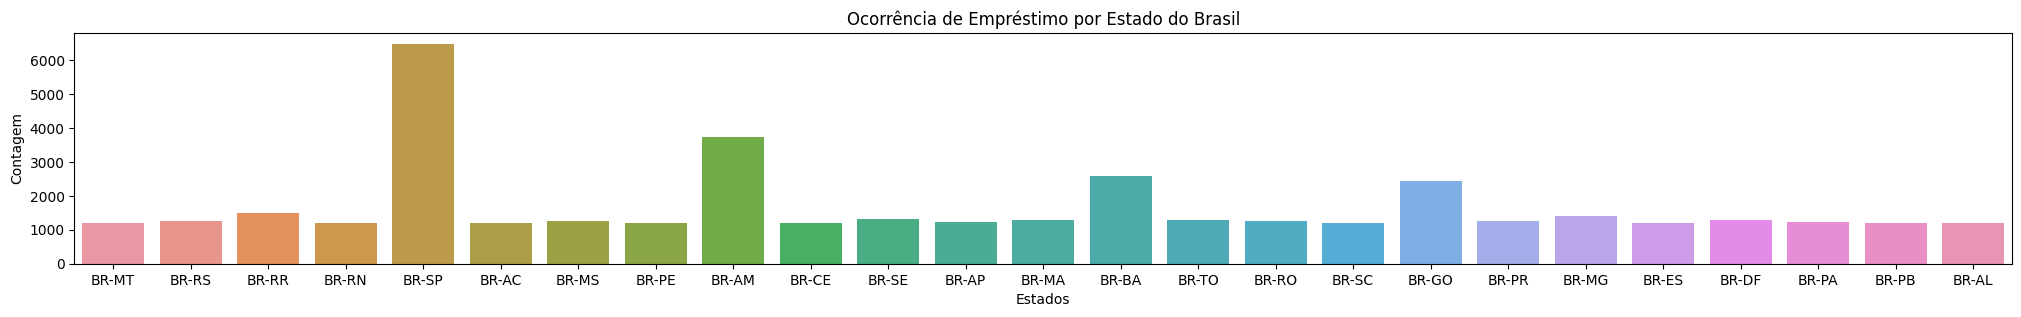

In [88]:
# Analisando Ocorrências de empréstimos por estado

fig, ax = plt.subplots()
sns.countplot(x=base_credit_clean['shipping_state'])
fig.set_size_inches(25, 3)
ax.set_title("Ocorrência de Empréstimo por Estado do Brasil")
ax.set_xlabel("Estados")
ax.set_ylabel("Contagem")
plt.show()

#print("Proporção entre Inadimplentes no Dataset:")
#print((base_credit_clean.loc[base_credit_clean['target_default']==True].value_counts() / base_credit_clean.shape[0] )*100);

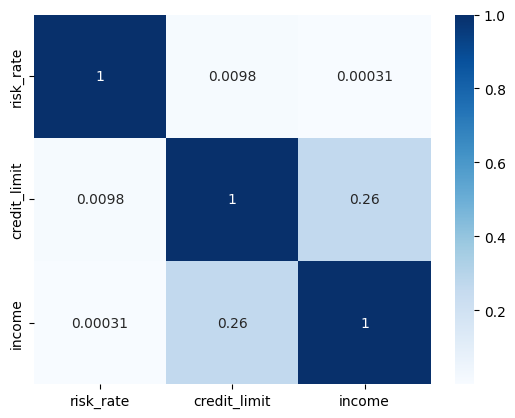

In [107]:
# Analise de correlação
sns.heatmap(base_credit_clean[['risk_rate','credit_limit','income']].corr(),cmap='Blues', annot=True);

# **Preparação dos Dados**
Aplicando o Label Encoding, que irá substituir as nossas variáveis categóricas por valores.

In [90]:
# importando a biblioteca para normalizar nossos dados
from sklearn.preprocessing import StandardScaler

In [91]:
# fazendo uma copia do nosso dataset já limpo para um novo dataset a ser normalizado
scaled_df = base_credit_clean.copy()

In [92]:
# normalizando as colunas numéricas
num_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

In [93]:
scaled_df.head(5)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,...,-0.057693,1.604337,1.577495,1.341208,0.0,0.444809,1.322812,0.501783,-0.040691,BR-MT
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,...,-0.057693,0.732520,0.937596,0.671463,0.0,-0.452701,-0.635622,-0.894101,-0.040691,BR-RS
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,...,-0.057693,-0.139296,-1.302049,-1.652141,0.0,0.444809,-1.096430,-1.512178,-0.040691,BR-RR
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,...,-0.057693,1.822291,1.737469,1.081511,0.0,1.342319,0.573999,1.092082,-0.040691,BR-RN
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,...,-0.057693,0.078658,-1.302049,-0.052955,0.0,0.444809,1.034807,-0.626730,-0.040691,BR-MT


In [94]:
# importando a biblioteca necessária para rotular nossas ocorrencias
from sklearn.preprocessing import LabelEncoder

In [95]:
# gerando uma cópia de nosso dataset para um novo que vamos rotular (Label Encoding)
encoded_df = scaled_df.copy()

In [96]:
# extrair as colunas categóricas e colocando numa variável
cat_cols = encoded_df.select_dtypes('object').columns

In [97]:
# codificando cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

In [98]:
# verificando nossos dados
encoded_df.head(5)

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded,shipping_state_encoded
0,False,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,...,0.0,0.444809,1.322812,0.501783,-0.040691,0,10,44,1,12
1,False,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,...,0.0,-0.452701,-0.635622,-0.894101,-0.040691,3,16,47,1,20
2,True,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,...,0.0,0.444809,-1.096430,-1.512178,-0.040691,3,9,32,3,19
3,False,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,...,0.0,1.342319,0.573999,1.092082,-0.040691,0,21,23,3,17
4,False,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,...,0.0,0.444809,1.034807,-0.626730,-0.040691,2,1,47,3,12


Antes de iniciarmos nossos modelos de Machine Learning vamos plotar e verificar a correlação entre as variáveis, se nos trazem mais algum insight sobre os dados, porém precisamos ajustar nosso dataset para as mesmas condições de treino e testes (normalizado e codificado).

# **Criando Modelo de Machine Learning**
Separando a variável alvo das demais e dividir o dataset entre dados de treino e teste com a função train_test_split.

In [99]:
# separando as variáveis independentes da variável alvo
# X todas as colunas sem a coluna 'target_default
# y apenas a coluna 'target_default

X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

In [100]:
# nossos dados após o split
X.head()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,...,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded,shipping_state_encoded
0,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,...,0.0,0.444809,1.322812,0.501783,-0.040691,0,10,44,1,12
1,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,...,0.0,-0.452701,-0.635622,-0.894101,-0.040691,3,16,47,1,20
2,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,...,0.0,0.444809,-1.096430,-1.512178,-0.040691,3,9,32,3,19
3,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,...,0.0,1.342319,0.573999,1.092082,-0.040691,0,21,23,3,17
4,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,...,0.0,0.444809,1.034807,-0.626730,-0.040691,2,1,47,3,12


Validação Cruzada com KFold

In [101]:
# importando o modelo de seleção - KFold
from sklearn.model_selection import KFold

# importando nossas metricas
from sklearn.metrics import accuracy_score

# importando nosso modelo de machine learning - XGBoost
from xgboost import XGBClassifier

# importando nossa biblioteca de funções matemáticas
import numpy as np

In [102]:
# Verificando nossa métrica com XGBClassifier
# Com 5 repetições para cada divisão dos dados em 3 splits

resultados = []
for rep in range(5):
  print ('Repetição :',rep)
  kf = KFold(n_splits=3, shuffle=True, random_state = rep)

  for linhas_treino, linhas_teste in kf.split(X):
    print('Treino :', linhas_treino.shape[0])
    print('Teste :', linhas_teste.shape[0])

    X_train, X_test = X.iloc[linhas_treino], X.iloc[linhas_teste]
    y_train, y_test = y.iloc[linhas_treino], y.iloc[linhas_teste]

    ml_model = XGBClassifier(learning_rate=0.0145, n_estimators=1000, max_depth=6, subsample=1.0, colsample_bytree=1.0, gamma=1,
                         random_state=0, n_jobs=1) # 84.84
    ml_model.fit(X_train, y_train)

    p = ml_model.predict(X_test)

    acc = np.mean(y_test == p)

    resultados.append(acc)

    print()
    print('Acurácia',acc)
    print()

Repetição : 0
Treino : 27827
Teste : 13914

Acurácia 0.8371424464568061

Treino : 27827
Teste : 13914

Acurácia 0.8447606727037517

Treino : 27828
Teste : 13913

Acurácia 0.8397901243441386

Repetição : 1
Treino : 27827
Teste : 13914

Acurácia 0.842101480523214

Treino : 27827
Teste : 13914

Acurácia 0.8388673278712089

Treino : 27828
Teste : 13913

Acurácia 0.8400057500179688

Repetição : 2
Treino : 27827
Teste : 13914

Acurácia 0.8424608308178813

Treino : 27827
Teste : 13914

Acurácia 0.8395860284605433

Treino : 27828
Teste : 13913

Acurácia 0.8418745058578309

Repetição : 3
Treino : 27827
Teste : 13914

Acurácia 0.8383642374586747

Treino : 27827
Teste : 13914

Acurácia 0.8407359494034785

Treino : 27828
Teste : 13913

Acurácia 0.8458995184359951

Repetição : 4
Treino : 27827
Teste : 13914

Acurácia 0.8436826218197498

Treino : 27827
Teste : 13914

Acurácia 0.8364956159264051

Treino : 27828
Teste : 13913

Acurácia 0.8423057572054913



In [103]:
# Nossa acurácia média
np.mean(resultados)

0.8409381911535425